#1. Permitir el acceso a Google Drive para cargar el data set

In [30]:
# Permitir el acceso a Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 2. Se importan todas las librerías que se van a utilizar, incluidas train_test_split y las de los modelos de pronóstico a probar

In [31]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

#3.Ingesta y Descripción de Datos

In [32]:
# Para iniciar el análisis, se procede a leer el archivo y se importa el dataset (el cual se encuentra en Drive por su peso). 
# Ajustar la ruta si es necesario
df = pd.read_csv('/content/drive/MyDrive/Aprendizaje_Automatico/Tarea2_Supervisado/datasets/train.csv', parse_dates=True)


In [33]:
# Visualizamos los primeros 5 datos del dataset
print(df.head())

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE   0.00            0
1   1  2013-01-01          1   BABY CARE   0.00            0
2   2  2013-01-01          1      BEAUTY   0.00            0
3   3  2013-01-01          1   BEVERAGES   0.00            0
4   4  2013-01-01          1       BOOKS   0.00            0


In [34]:
# Analizamos los registros del dataset
print('Información del dataset:')
print(df.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


In [35]:
# Utilizamos describe para ver los estadísticos descriptivos para cada variable
pd.set_option('display.float_format',lambda x: '%.2f' % x)
print('Descripción del dataset:')
df.describe()

Descripción del dataset:


,id,store_nbr,sales,onpromotion
count,3000888.00,3000888.00,3000888.00,3000888.00
mean,1500443.50,27.50,357.78,2.60
std,866281.89,15.59,1102.00,12.22
min,0.00,1.00,0.00,0.00
25%,750221.75,14.00,0.00,0.00
50%,1500443.50,27.50,11.00,0.00
75%,2250665.25,41.00,195.85,0.00
max,3000887.00,54.00,124717.00,741.00


In [36]:
# Si queremos hallar un cuartil en particular para reforzar el análisis estadístico
df.quantile(0.8)


<ipython-input-36-e0ed5b13cfce>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.8)


id            2400709.60
store_nbr          44.00
sales             296.96
onpromotion         1.00
Name: 0.8, dtype: float64

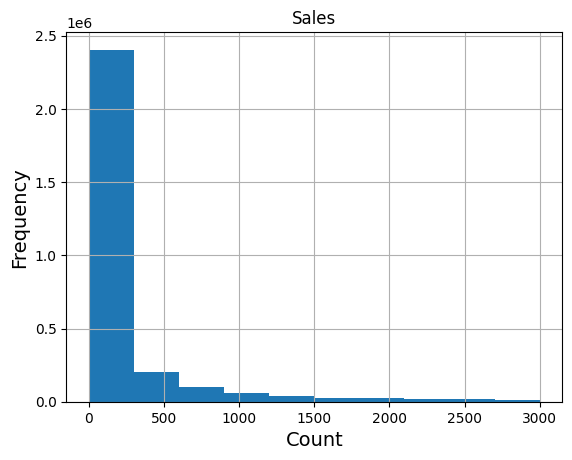

In [37]:
# Graficamos un histograma para la variable Sales
df['sales'].hist(bins=10,range=(0,3000))
plt.xlabel('Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Sales')
plt.show()

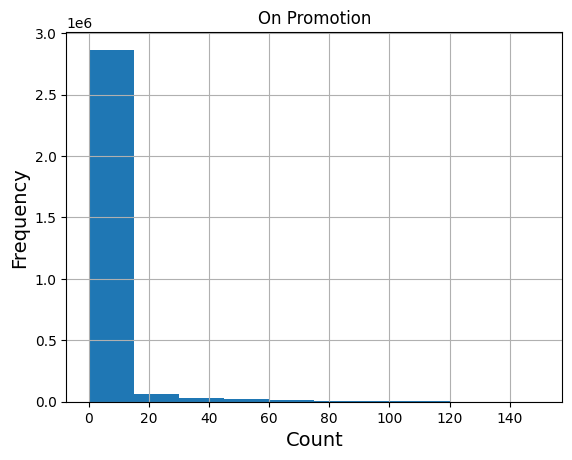

In [38]:
# Graficamos un histograma para la variable OnPromotion
df['onpromotion'].hist(bins=10,range=(0,150))
plt.xlabel('Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('On Promotion')
plt.show()

In [39]:
# Revisamos la distribución de los datos de acuerdo a las familias de producto
print('Distribución de las familias:')
df.groupby(by=['family'])['sales'].count()

Distribución de las familias:


family
AUTOMOTIVE                    90936
BABY CARE                     90936
BEAUTY                        90936
BEVERAGES                     90936
BOOKS                         90936
BREAD/BAKERY                  90936
CELEBRATION                   90936
CLEANING                      90936
DAIRY                         90936
DELI                          90936
EGGS                          90936
FROZEN FOODS                  90936
GROCERY I                     90936
GROCERY II                    90936
HARDWARE                      90936
HOME AND KITCHEN I            90936
HOME AND KITCHEN II           90936
HOME APPLIANCES               90936
HOME CARE                     90936
LADIESWEAR                    90936
LAWN AND GARDEN               90936
LINGERIE                      90936
LIQUOR,WINE,BEER              90936
MAGAZINES                     90936
MEATS                         90936
PERSONAL CARE                 90936
PET SUPPLIES                  90936
PLAYERS AND ELECTRONI

In [11]:
# Revisamos la distribución de los datos de acuerdo a la variable store_nbr (store_nbr)
print('Distribución de las tiendas:')
df.groupby(by=['store_nbr'])['sales'].count()

Distribución de las tiendas:


store_nbr
1     55572
2     55572
3     55572
4     55572
5     55572
6     55572
7     55572
8     55572
9     55572
10    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
30    55572
31    55572
32    55572
33    55572
34    55572
35    55572
36    55572
37    55572
38    55572
39    55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
46    55572
47    55572
48    55572
49    55572
50    55572
51    55572
52    55572
53    55572
54    55572
Name: sales, dtype: int64

#4. Preparación y limpieza de datos

In [16]:
# Seleccionamos una muestra respetando el balance
sample_number = 60
groups = df.groupby(['store_nbr','family'])
df_s = groups.apply(lambda x: x.sample(n=sample_number))
df_s.reset_index(drop=True, inplace=True)
df_s

,id,date,store_nbr,family,sales,onpromotion
0,1858626,2015-11-12,1,AUTOMOTIVE,8.00,0
1,208494,2013-04-28,1,AUTOMOTIVE,0.00,0
2,1618056,2015-06-30,1,AUTOMOTIVE,4.00,0
3,2628450,2017-01-19,1,AUTOMOTIVE,2.00,0
4,247698,2013-05-20,1,AUTOMOTIVE,3.00,0
...,...,...,...,...,...,...
106915,1388045,2015-02-20,54,SEAFOOD,1.00,0
106916,2460809,2016-10-15,54,SEAFOOD,1.00,1
106917,1416557,2015-03-08,54,SEAFOOD,0.00,0
106918,2298647,2016-07-16,54,SEAFOOD,0.00,0


In [17]:
# Validamos que se respete el balance para la variable family
df_s.groupby(by=['family'])['sales'].count()

family
AUTOMOTIVE                    3240
BABY CARE                     3240
BEAUTY                        3240
BEVERAGES                     3240
BOOKS                         3240
BREAD/BAKERY                  3240
CELEBRATION                   3240
CLEANING                      3240
DAIRY                         3240
DELI                          3240
EGGS                          3240
FROZEN FOODS                  3240
GROCERY I                     3240
GROCERY II                    3240
HARDWARE                      3240
HOME AND KITCHEN I            3240
HOME AND KITCHEN II           3240
HOME APPLIANCES               3240
HOME CARE                     3240
LADIESWEAR                    3240
LAWN AND GARDEN               3240
LINGERIE                      3240
LIQUOR,WINE,BEER              3240
MAGAZINES                     3240
MEATS                         3240
PERSONAL CARE                 3240
PET SUPPLIES                  3240
PLAYERS AND ELECTRONICS       3240
POULTRY      

In [18]:
# Validamos que se respete el balance para la variable store_nbr
df_s.groupby(by=['store_nbr'])['sales'].count()

store_nbr
1     1980
2     1980
3     1980
4     1980
5     1980
6     1980
7     1980
8     1980
9     1980
10    1980
11    1980
12    1980
13    1980
14    1980
15    1980
16    1980
17    1980
18    1980
19    1980
20    1980
21    1980
22    1980
23    1980
24    1980
25    1980
26    1980
27    1980
28    1980
29    1980
30    1980
31    1980
32    1980
33    1980
34    1980
35    1980
36    1980
37    1980
38    1980
39    1980
40    1980
41    1980
42    1980
43    1980
44    1980
45    1980
46    1980
47    1980
48    1980
49    1980
50    1980
51    1980
52    1980
53    1980
54    1980
Name: sales, dtype: int64

In [19]:
# Llevamos la vartiable categórica "Family" a una categoría numérica
df_cleaned = df_s.copy()
category = pd.Categorical(df_s['family'], categories=df_s['family'].unique())
df_cleaned['family'] = category.codes
df_cleaned

,id,date,store_nbr,family,sales,onpromotion
0,1858626,2015-11-12,1,0,8.00,0
1,208494,2013-04-28,1,0,0.00,0
2,1618056,2015-06-30,1,0,4.00,0
3,2628450,2017-01-19,1,0,2.00,0
4,247698,2013-05-20,1,0,3.00,0
...,...,...,...,...,...,...
106915,1388045,2015-02-20,54,32,1.00,0
106916,2460809,2016-10-15,54,32,1.00,1
106917,1416557,2015-03-08,54,32,0.00,0
106918,2298647,2016-07-16,54,32,0.00,0


#5.  Ingenieria de Características

In [20]:
# Desagregamos la fecha en semanas 
df_feature_eng = df_cleaned.copy()
df_feature_eng['date'] = pd.to_datetime(df_feature_eng['date'])
df_feature_eng['week'] = df_feature_eng['date'].dt.week
df_feature_eng

<ipython-input-20-d67781411df8>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_feature_eng['week'] = df_feature_eng['date'].dt.week


,id,date,store_nbr,family,sales,onpromotion,week
0,1858626,2015-11-12,1,0,8.00,0,46
1,208494,2013-04-28,1,0,0.00,0,17
2,1618056,2015-06-30,1,0,4.00,0,27
3,2628450,2017-01-19,1,0,2.00,0,3
4,247698,2013-05-20,1,0,3.00,0,21
...,...,...,...,...,...,...,...
106915,1388045,2015-02-20,54,32,1.00,0,8
106916,2460809,2016-10-15,54,32,1.00,1,41
106917,1416557,2015-03-08,54,32,0.00,0,10
106918,2298647,2016-07-16,54,32,0.00,0,28


In [21]:
# Validamos el tipo de datos de la base de datos modificada
df_feature_eng.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                   int8
sales                 float64
onpromotion             int64
week                    int64
dtype: object

In [22]:
# Las semanas se pusieron como features binarios a través de one hot encoding
one_hot_columns = ['store_nbr','family','week']

for col in one_hot_columns:
  one_hot = pd.get_dummies(df_feature_eng[col])
  df_feature_eng = pd.concat([df_feature_eng,one_hot],axis=1)

df_feature_eng.drop(columns=one_hot_columns,inplace=True)

df_feature_eng

,id,date,sales,onpromotion,1,2,3,4,5,6,...,44,45,46,47,48,49,50,51,52,53
0,1858626,2015-11-12,8.00,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,208494,2013-04-28,0.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1618056,2015-06-30,4.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2628450,2017-01-19,2.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,247698,2013-05-20,3.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106915,1388045,2015-02-20,1.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106916,2460809,2016-10-15,1.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106917,1416557,2015-03-08,0.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106918,2298647,2016-07-16,0.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Se validaron las columnas del df ajustado
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [24]:
# inputs son los datos con las características
# label son los datos con las etiquetas o las respuestas que en este caso es la variable sales 
inputs = ['store_nbr', 'family', 'onpromotion', 'week']
label = ['sales']

#6.  Selección del Modelo

In [26]:
# Se eliminan las variables date, id y sales de los datos X o datos con las características
# Los datos con las etiquetas o respuestas ( variable sales) son la variable y
df_final = df_feature_eng.copy()
X = df_final.copy()
X.drop(columns=['date','id','sales'],inplace=True)
y = df_final[label]
X = X.values
y = y.values
# Separamos los datos de entrenamiento y prueba utilizando para probar los algoritmos, utilizando train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 71636 datos para entrenamiento y 35284 datos para prueba


In [ ]:
#Estandarizamos el entrenamiento.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Regresión Lineal Básica
model = LinearRegression()
model.fit(X_train_scaled,y_train)

print("Regresión Lineal Básica")
y_pred_train = model.predict(X_train_scaled)
mse = mean_squared_error(y_pred_train, np.array(y_train))
print("R2 Training: ", model.score(X_train_scaled,y_train))
print("MSE Training: ", mse)

y_pred_test = model.predict(X_test_scaled)
mse = mean_squared_error(y_pred_test, np.array(y_test))
print("R2 Testing: ", model.score(X_test_scaled,y_test))
print("MSE Testing: ", mse)

Regresión Lineal Básica
R2 Training:  0.5778498828223521
MSE Training:  514155.6613704735
R2 Testing:  -9.324077355425926e+21
MSE Testing:  1.1286547956174353e+28


In [ ]:
# Regresión Ridge
model = Ridge(alpha=0.1)
model.fit(X_train_scaled,y_train)

print("Regresión Ridge")
y_pred_train = model.predict(X_train_scaled)
mse = mean_squared_error(y_pred_train, np.array(y_train))
print("R2 Training: ", model.score(X_train_scaled,y_train))
print("MSE Training: ", mse)

y_pred_test = model.predict(X_test_scaled)
mse = mean_squared_error(y_pred_test, np.array(y_test))
print("R2 Testing: ", model.score(X_test_scaled,y_test))
print("MSE Testing: ", mse)

Regresión Ridge
R2 Training:  0.5778609091862476
MSE Training:  514142.23186473496
R2 Testing:  0.5855367428915852
MSE Testing:  501696.76302655024


In [ ]:
# Regresión Lasso
model = Lasso(alpha=0.1)
model.fit(X_train_scaled,y_train)

print("Regresión Lasso")
y_pred_train = model.predict(X_train_scaled)
mse = mean_squared_error(y_pred_train, np.array(y_train))
print("R2 Training: ", model.score(X_train_scaled,y_train))
print("MSE Training: ", mse)

y_pred_test = model.predict(X_test_scaled)
mse = mean_squared_error(y_pred_test, np.array(y_test))
print("R2 Testing: ", model.score(X_test_scaled,y_test))
print("MSE Testing: ", mse)

Regresión Lasso
R2 Training:  0.5778598007710398
MSE Training:  514143.581853592
R2 Testing:  0.5855368684084187
MSE Testing:  501696.61109175754


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.183e+07, tolerance: 8.725e+06
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Árbol de Decisión
model = DecisionTreeRegressor()
model.fit(X_train_scaled,y_train)

print("Decision Tree")
y_pred_train = model.predict(X_train_scaled)
mse = mean_squared_error(y_pred_train, np.array(y_train))
print("R2 Training: ", model.score(X_train_scaled,y_train))
print("MSE Training: ", mse)

y_pred_test = model.predict(X_test_scaled)
mse = mean_squared_error(y_pred_test, np.array(y_test))
print("R2 Testing: ", model.score(X_test_scaled,y_test))
print("MSE Testing: ", mse)

Decision Tree
R2 Training:  0.9886934075296726
MSE Training:  13770.808754700005
R2 Testing:  0.7380090413669242
MSE Testing:  317133.0959599515


In [ ]:
# Random Forest
model = RandomForestRegressor()
model.fit(X_train_scaled,y_train)

print("Random Forest")
y_pred_train = model.predict(X_train_scaled)
mse = mean_squared_error(y_pred_train, np.array(y_train))
print("R2 Training: ", model.score(X_train_scaled,y_train))
print("MSE Training: ", mse)

y_pred_test = model.predict(X_test_scaled)
mse = mean_squared_error(y_pred_test, np.array(y_test))
print("R2 Testing: ", model.score(X_test_scaled,y_test))
print("MSE Testing: ", mse)

<ipython-input-50-e7882dc2c550>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled,y_train)


Random Forest
R2 Training:  0.9661124421621811
MSE Training:  41273.1845932471
R2 Testing:  0.7990786701821382
MSE Testing:  243209.93251820054


In [ ]:
# Random Forest con 5 árboles y 2 muestras como mínimo para dividir un nodo
model = RandomForestRegressor(n_estimators = 5, min_samples_leaf=2)
model.fit(X_train_scaled,y_train)

print("Random Forest")
y_pred_train = model.predict(X_train_scaled)
mse = mean_squared_error(y_pred_train, np.array(y_train))
print("R2 Training: ", model.score(X_train_scaled,y_train))
print("MSE Training: ", mse)

y_pred_test = model.predict(X_test_scaled)
mse = mean_squared_error(y_pred_test, np.array(y_test))
print("R2 Testing: ", model.score(X_test_scaled,y_test))
print("MSE Testing: ", mse)

<ipython-input-51-6b8953e3e90a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled,y_train)


Random Forest
R2 Training:  0.8924074428041324
MSE Training:  131041.82647970812
R2 Testing:  0.8051271686469244
MSE Testing:  235888.3857974486


In [ ]:
# Random Forest con 200 árboles
model = RandomForestRegressor(n_estimators = 200)
model.fit(X_train_scaled,y_train)

print("Random Forest")
y_pred_train = model.predict(X_train_scaled)
mse = mean_squared_error(y_pred_train, np.array(y_train))
print("R2 Training: ", model.score(X_train_scaled,y_train))
print("MSE Training: ", mse)

y_pred_test = model.predict(X_test_scaled)
mse = mean_squared_error(y_pred_test, np.array(y_test))
print("R2 Testing: ", model.score(X_test_scaled,y_test))
print("MSE Testing: ", mse)

<ipython-input-52-a58fdd460644>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled,y_train)


Random Forest
R2 Training:  0.9671235752129963
MSE Training:  40041.68006127824
R2 Testing:  0.7991415128790911
MSE Testing:  243133.86310287754
